# <center> La régression linéaire multiple dans la prédiction du CAC40          
#    <center> Recueillons les données avec l’outil de Google correspondant aux dates des données CAC40 récupérées<center> 

## <center><u><p><font color="blue"> Hypothèse :  En théorie économique, dans un système qui fonctionne bien, il n’est pas possible de prédire le cours futur à partir du cours passé. Le projet consiste à vérifier les difficultés à prédire le CAC40 avec une régression linéaire multiple et de tester si l’apport d’informations externes peut aider la prédiction. </font></p><u><center>

## I) Dans cette première partie, nous allons obtenir les données 

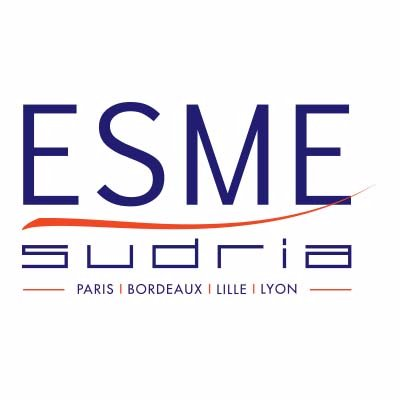

In [80]:
from IPython.display import HTML, Image, YouTubeVideo, display
Image('https://pbs.twimg.com/profile_images/831186374585880577/aQAqWwjG_400x400.jpg', width=300)

In [81]:
import pandas as pd # Librarie pandas evoqué dans 1. Obtention des données

In [82]:
#Nous ne savons pas a quoi va ressembler la datframe autant mettre des fonctions permet de tout voir

pd.set_option('display.max_rows',None,"display.max_columns", None)
# me montre toutes mes columns de ma df (df = dataframe)
#me montre tout les ligne de macolumn ma df (df = dataframe)
#None designe le nombre d'element maximum, dans mon cas aucune limite
#Nous aurions pu le remplacer par un chiffre.

## Les libellés et les codes des valeurs


In [83]:
df_li2 = pd.read_csv('Data/libelles.csv', sep=";")
#Ici pas besoin de mettre le header à None.
df_li=df_li2.sort_values('nom')

df_li 

,ISIN,nom,ticker
8,FR0000120404,Accor Hotels,AC
4,FR0000120073,Air Liquide,AI
39,NL0000235190,Airbus,AIR
37,LU1598757687,Arcelor Mittal,MT
1,FR0000051732,Atos,ATO
11,FR0000120628,Axa,CS
29,FR0000131104,Bnp Paribas,BNP
9,FR0000120503,Bouygues,EN
23,FR0000125338,CapGemini,CAP
5,FR0000120172,Carrefour,CA


## Libellés sur liste 

### Liste ticker

In [84]:
#ici nous listons les ticker des entreprises de la column ticker
my_list_Ticker = df_li["ticker"].tolist()
print(my_list_Ticker)

['AC', 'AI', 'AIR', 'MT', 'ATO', 'CS', 'BNP', 'EN', 'CAP', 'CA', 'ACA', 'BN', 'DSY', 'ENGI', 'EL', 'RMS', 'KER', 'OR', 'LR', 'MC', 'ML', 'ORA', 'RI', 'UG', 'PUB', 'RNO', 'SAF', 'SGO', 'SAN', 'SU', 'GLE', 'SW', 'STM', 'FTI', 'FP', 'URW', 'FR', 'VIE', 'DG', 'VIV']


In [85]:
#mystring_1="Data/Cours_propre/"
mystring_2 =".PA"
#my_data_propre = [mystring_1 + s + mystring_2 for s in my_list_Ticker]
my_data_propre = [s + mystring_2 for s in my_list_Ticker]
print(sorted(my_data_propre))

#^FCHI pour le cac 40
#MT = MT.AS
#URW.AS = unibail = URW
#Essilor problème car nouveau contrat 

['AC.PA', 'ACA.PA', 'AI.PA', 'AIR.PA', 'ATO.PA', 'BN.PA', 'BNP.PA', 'CA.PA', 'CAP.PA', 'CS.PA', 'DG.PA', 'DSY.PA', 'EL.PA', 'EN.PA', 'ENGI.PA', 'FP.PA', 'FR.PA', 'FTI.PA', 'GLE.PA', 'KER.PA', 'LR.PA', 'MC.PA', 'ML.PA', 'MT.PA', 'OR.PA', 'ORA.PA', 'PUB.PA', 'RI.PA', 'RMS.PA', 'RNO.PA', 'SAF.PA', 'SAN.PA', 'SGO.PA', 'STM.PA', 'SU.PA', 'SW.PA', 'UG.PA', 'URW.PA', 'VIE.PA', 'VIV.PA']


In [86]:
#Reglage Essilor, car il y'a eu des accords durant un temps
dfEL= pd.read_csv('Data/EntrepriseCAC40/EL.txt', sep=";", index_col=1, parse_dates=True,infer_datetime_format=False,dayfirst=True,header=None)
#df = pd.read_csv('data/PX1.txt', sep=";",parse_dates=True, infer_datetime_format=True, header=None)

#df : data
#pd : car j'ai mis que pandas devient pd
#sep=";" : deliminter, c'est un character special qui separe les différents column de dasaset entre elles.
#index_col=0 : nous visons la deuxieme column du fichier:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
#parse_dates=True,
#infer_datetime_format=True)
#header=None : empêche que la première ligne de la df deviene les titre de sa même colone
#si la dataframe n'a aucun titre cela peut se produire, avec le None on assure de rien perdre.
#Nous montre la df
dfEL.head()

,0,2,3,4,5,6
1,,,,,,
2017-03-01,EL,108.85,110.65,108.50,109.5,552596
2017-03-02,EL,109.20,109.20,106.70,108.5,751009
2017-03-03,EL,108.05,108.90,106.95,108.9,494050
2017-03-06,EL,108.40,108.55,107.70,108.4,302121
2017-03-07,EL,108.70,108.70,107.55,108.0,398724


### Interpretation Mathématique de la df

Première vue d'ensemble de la df.
Mathématiquement nous pouvons l'interpreter.
Vous savez, la data peut parfois être representer comme un une donnée **matriciel de n*d**.

Avec **n**: nombre de rows
et **d**: nombre de column

Où
**rows**: represente **les entities de la dasaet**
**column**: reprensete **les attribut de la dataset**

Chaque row dans la data matriciel enregistre des données observé en rapport avec
sa son entités.

Les **n*d** de cette data matriciel sont données par:

j denote le j ième nombre du d-tuple:
sur les **Xj** (attribut): [0, 1, 2, 3, 4, 5, 6]

i denote le ième nombre du d-tuple
sur les **xi** : [0, 1, 2, ......,510]

d-tuple: collection ordonée de n objet


D'accord nous venons de comprendre la df maintenant a quoi correspond chaque column?
Hey Bien sur le site:
**https://www.abcbourse.com/download/download.aspx?s=PX1p**

On dis le nom de chaque column, donc on sait a quoi correspond chaque column
Renomons nos columns des **Xj** (attribut): [0, 1, 2, 3, 4, 5, 6]

Par:
      **Xj**=**['Identifiant de la valeur', 'Date', 'le cours d'ouverture',
       'le plus haut', 'le plus bas', 'le cours de clôture',
       'le volume de titres échangés']**


In [87]:
#renome les columns
dfEL.columns = ["ISIN_G", "EL_O", "EL_H", "EL_L","EL_C", "EL_V"]
dfEL.index.names = ['Date']
del dfEL["ISIN_G"]
dfEL.head()

,EL_O,EL_H,EL_L,EL_C,EL_V
Date,,,,,
2017-03-01,108.85,110.65,108.50,109.5,552596
2017-03-02,109.20,109.20,106.70,108.5,751009
2017-03-03,108.05,108.90,106.95,108.9,494050
2017-03-06,108.40,108.55,107.70,108.4,302121
2017-03-07,108.70,108.70,107.55,108.0,398724


In [88]:
#Pour le CAC40
symbols= ["^FCHI"]


######################
######################
#Deux probleme URW,EL.
# pour URW index 320 : URW;05/06/18; 191.45;193.00;189.95;192.45;584424


######################
######################

#Des entreprises du CAC40 valeur
#symbols = ['AC.PA', 'ACA.PA', 'AI.PA', 'AIR.PA', 'ATO.PA', 'BN.PA', 'BNP.PA', 'CA.PA', 'CAP.PA', 'CS.PA', 'DG.PA', 'DSY.PA', 'EL.PA', 'EN.PA', 'ENGI.PA', 'FP.PA', 'FR.PA', 'FTI.PA', 'GLE.PA', 'KER.PA', 'LR.PA', 'MC.PA', 'ML.PA', 'MT.AS', 'OR.PA', 'ORA.PA', 'PUB.PA', 'RI.PA', 'RMS.PA', 'RNO.PA', 'SAF.PA', 'SAN.PA', 'SGO.PA', 'STM.PA', 'SU.PA', 'SW.PA', 'UG.PA', 'URW.AS', 'VIE.PA', 'VIV.PA']
                                                        

#symbols = ["EI.VI"]
#symbols = ["EL.PA"]

  # the symbols for the portfolio optimization
noa = len(symbols)


In [89]:
#pandas provides functions to retrieve stock price information from eg Yahoo! or Google.
#import pandas.io.data as web
#from pandas_datareader import data, wb
import pandas_datareader.data as web

In [90]:
import os

data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='yahoo', start='2017-03-01', end='2019-03-01')["Open"]
data.columns = symbols

#CAC40 valeur
    #Open
#data.to_csv("/Users/Administrateur/Documents/ESME3/projet/Pred/Data/CAC4O/dfCAC_Open.csv")
    #High
#data.to_csv("/Users/Administrateur/Documents/ESME3/projet/Pred/Data/CAC4O/dfCAC_High.csv")
    #Low
#data.to_csv("/Users/Administrateur/Documents/ESME3/projet/Pred/Data/CAC4O/dfCAC_Low.csv")
    #Close
#data.to_csv("/Users/Administrateur/Documents/ESME3/projet/Pred/Data/CAC4O/dfCAC_Close.csv")
    #Adj Close
#data.to_csv("/Users/Administrateur/Documents/ESME3/projet/Pred/Data/CAC4O/dfCAC_AdjClose.csv")
    #volume
#data.to_csv("/Users/Administrateur/Documents/ESME3/projet/Pred/Data/CAC4O/dfCAC_Volume.csv")

######################
######################
######################

#Des entreprises du CAC40 valeur
######################
 #Open
# data["EL.PA"]= dfEL["EL_O"]
# data.reset_index(inplace = True)
# data.loc[320,"URW.AS"] = "191.45"
# data["EL.PA"] = data["EL.PA"].astype(float)
# data.set_index("Date", inplace =True)
# ######################
#data.to_csv("/Users/Administrateur/Documents/ESME3/projet/Pred/Data/EntrepriseCAC40/dfEntrepriseCAC_Open.csv")
######################    
    #High
# data["EL.PA"]= dfEL["EL_H"]
# data.reset_index(inplace = True)
# data.reset_index(inplace = True)
# data.loc[320,"URW.AS"] = "193.00"
# data["EL.PA"] = data["EL.PA"].astype(float)
# data.set_index("Date", inplace =True)
# #####################
# data.to_csv("/Users/Administrateur/Documents/ESME3/projet/Pred/Data/EntrepriseCAC40/dfEntrepriseCAC_High.csv")
# #####################    
    #Low
# data["EL.PA"]= dfEL["EL_L"]
# data.reset_index(inplace = True)
# data.loc[320,"URW.AS"] = "191.45"
# data["EL.PA"] = data["EL.PA"].astype(float)
# data.set_index("Date", inplace =True)
# #####################
# data.to_csv("/Users/Administrateur/Documents/ESME3/projet/Pred/Data/EntrepriseCAC40/dfEntrepriseCAC_Low.csv")
# #####################    
    #Close
# data["EL.PA"]= dfEL["EL_C"]
# data.reset_index(inplace = True)
# data.loc[320,"URW.AS"] = "192.45"
# data["EL.PA"] = data["EL.PA"].astype(float)
# data.set_index("Date", inplace =True)
# #####################
# data.to_csv("/Users/Administrateur/Documents/ESME3/projet/Pred/Data/EntrepriseCAC40/dfEntrepriseCAC_Close.csv")
#####################    
    #Adj Close
######################
#data.to_csv("/Users/Administrateur/Documents/ESME3/projet/Pred/Data/EntrepriseCAC40/dfEntrepriseCAC_AdjClose.csv")
######################    
    #Volume
# data["EL.PA"]= dfEL["EL_V"]
# data.reset_index(inplace = True)
# data.loc[320,"URW.AS"] = "584424"
# data["EL.PA"] = data["EL.PA"].astype(float)
# data.set_index("Date", inplace =True)
######################
#data.to_csv("/Users/Administrateur/Documents/ESME3/projet/Pred/Data/EntrepriseCAC40/dfEntrepriseCAC_Volume.csv")
#data.head()



In [91]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 511 entries, 2017-03-01 to 2019-03-01
Data columns (total 1 columns):
^FCHI    511 non-null float64
dtypes: float64(1)
memory usage: 8.0 KB


^FCHI    0
dtype: int64

## Verification des données 

            Entreprise rentrons dans le CAC40   à la Place de:

    24 septembre 2018 Dassault Systèmes	    ->     Solvay (entreprise)
    18 juin 2018	Hermès	                ->     LafargeHolcim
    18 septembre 2017	STMicroelectronics	->     Nokia
    20 mars 2017	Atos                    ->     Klépierre

## Verification des données 

## Data Frame CAC 40

In [92]:
#Data frame CAC40 Open
dfC_O = pd.read_csv("Data/CAC4O/dfCAC_Open.csv",index_col=0)
#Data frame CAC40 High
dfC_H = pd.read_csv("Data/CAC4O/dfCAC_High.csv",index_col=0)
#Data frame CAC40 Low
dfC_L = pd.read_csv("Data/CAC4O/dfCAC_Low.csv",index_col=0)
#Data frame CAC40 Close
dfC_C = pd.read_csv("Data/CAC4O/dfCAC_Close.csv",index_col=0)
#Data frame CAC40 Adj Close
dfC_AdjC = pd.read_csv("Data/CAC4O/dfCAC_AdjClose.csv",index_col=0)
#Data frame CAC40 Volume
#dfC_V = pd.read_csv("Data/CAC4O/dfCAC_Volume.csv",index_col=0)

#For exemple dfCO = Data Frame CAC4O Open
#dfC_O.head()
#dfC_H.head()
#dfC_L.head()
dfC_C.head()
#dfC_AdjC.head()

,^FCHI
Date,
2017-03-01,4960.830078
2017-03-02,4963.799805
2017-03-03,4995.129883
2017-03-06,4972.189941
2017-03-07,4955.000000


## Data Frame Entreprise CAC4O

In [93]:
#Data frame Entreprise du CAC40 Open
dfE_O= pd.read_csv("Data/EntrepriseCAC40/dfEntrepriseCAC_Open.csv", index_col=0)
#Data frame Entreprise du CAC40 High
dfE_H= pd.read_csv("Data/EntrepriseCAC40/dfEntrepriseCAC_High.csv", index_col=0)
#Data frame Entreprise du CAC40 Low
dfE_L= pd.read_csv("Data/EntrepriseCAC40/dfEntrepriseCAC_Low.csv", index_col=0)
#Data frame Entreprise du CAC40 Close
dfE_C= pd.read_csv("Data/EntrepriseCAC40/dfEntrepriseCAC_Close.csv", index_col=0)
#Data frame Entreprise du CAC40 Adj Close
dfE_AdjC= pd.read_csv("Data/EntrepriseCAC40/dfEntrepriseCAC_AdjClose.csv", index_col=0)

#For exemple dfE_O = Data frame Entreprise du CAC40 Open
dfE_O.info()
dfE_O.head()
#dfE_H.head()
#dfE_L.head()
#dfE_C.head()
#dfE_AdjC.head()

<class 'pandas.core.frame.DataFrame'>
Index: 511 entries, 2017-03-01 to 2019-03-01
Data columns (total 40 columns):
AC.PA      511 non-null float64
ACA.PA     511 non-null float64
AI.PA      511 non-null float64
AIR.PA     511 non-null float64
ATO.PA     511 non-null float64
BN.PA      511 non-null float64
BNP.PA     511 non-null float64
CA.PA      511 non-null float64
CAP.PA     511 non-null float64
CS.PA      511 non-null float64
DG.PA      511 non-null float64
DSY.PA     511 non-null float64
EL.PA      511 non-null float64
EN.PA      511 non-null float64
ENGI.PA    511 non-null float64
FP.PA      511 non-null float64
FR.PA      511 non-null float64
FTI.PA     511 non-null float64
GLE.PA     511 non-null float64
KER.PA     511 non-null float64
LR.PA      511 non-null float64
MC.PA      511 non-null float64
ML.PA      511 non-null float64
MT.AS      511 non-null float64
OR.PA      511 non-null float64
ORA.PA     511 non-null float64
PUB.PA     511 non-null float64
RI.PA      511 non-n

,AC.PA,ACA.PA,AI.PA,AIR.PA,ATO.PA,BN.PA,BNP.PA,CA.PA,CAP.PA,CS.PA,DG.PA,DSY.PA,EL.PA,EN.PA,ENGI.PA,FP.PA,FR.PA,FTI.PA,GLE.PA,KER.PA,LR.PA,MC.PA,ML.PA,MT.AS,OR.PA,ORA.PA,PUB.PA,RI.PA,RMS.PA,RNO.PA,SAF.PA,SAN.PA,SGO.PA,STM.PA,SU.PA,SW.PA,UG.PA,URW.AS,VIE.PA,VIV.PA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-03-01,37.494999,11.1222,102.750000,69.690002,111.650002,62.900002,55.889999,22.665001,80.500000,22.490000,68.529999,76.800003,108.85,36.584999,11.565,47.250000,58.830002,30.510000,42.599998,215.072998,53.650002,191.350006,106.550003,25.170000,176.750000,14.360,63.990002,108.500000,414.799988,84.400002,67.500000,81.769997,45.759998,14.470,64.250000,104.000000,18.219999,215.699997,15.500000,16.725000
2017-03-02,37.540001,11.4593,103.550003,71.160004,111.500000,62.730000,57.910000,22.865000,82.080002,23.170000,69.760002,76.949997,109.20,37.150002,12.000,47.549999,59.470001,31.500000,43.980000,218.141006,54.259998,194.800003,106.849998,26.292000,176.000000,14.435,64.629997,108.650002,417.100006,86.400002,68.199997,82.779999,46.459999,14.775,65.570000,104.699997,18.389999,217.399994,15.800000,16.469999
2017-03-03,37.340000,11.3822,102.750000,71.570000,110.400002,62.750000,57.700001,22.790001,83.449997,23.195000,69.120003,76.730003,108.05,36.790001,12.725,47.654999,59.290001,31.480000,43.910000,215.445007,53.419998,193.699997,106.949997,25.320000,176.100006,14.250,63.959999,108.849998,419.000000,85.400002,68.730003,82.599998,45.549999,14.770,65.209999,105.000000,18.490000,214.899994,16.150000,16.684999
2017-03-06,37.250000,11.6807,102.849998,70.650002,110.650002,62.259998,58.990002,22.865000,83.849998,23.545000,70.029999,76.220001,108.40,37.195000,12.800,47.525002,59.660000,30.510000,45.770000,216.375000,53.279999,194.750000,106.300003,25.094999,176.050003,14.400,63.160000,108.250000,417.450012,87.199997,68.669998,83.559998,46.070000,14.700,65.320000,104.650002,20.000000,217.000000,16.200001,16.405001
2017-03-07,37.349998,11.7000,103.199997,70.940002,110.300003,62.049999,59.000000,22.900000,84.000000,23.575001,70.129997,76.629997,108.70,37.125000,12.835,47.650002,59.480000,30.299999,45.375000,217.908005,52.619999,194.250000,106.800003,24.855000,176.000000,14.470,62.250000,108.349998,419.649994,86.480003,69.050003,82.489998,45.709999,14.500,65.400002,104.949997,19.705000,217.699997,16.315001,16.495001


In [94]:
dfE_O.isnull().sum()

AC.PA      0
ACA.PA     0
AI.PA      0
AIR.PA     0
ATO.PA     0
BN.PA      0
BNP.PA     0
CA.PA      0
CAP.PA     0
CS.PA      0
DG.PA      0
DSY.PA     0
EL.PA      0
EN.PA      0
ENGI.PA    0
FP.PA      0
FR.PA      0
FTI.PA     0
GLE.PA     0
KER.PA     0
LR.PA      0
MC.PA      0
ML.PA      0
MT.AS      0
OR.PA      0
ORA.PA     0
PUB.PA     0
RI.PA      0
RMS.PA     0
RNO.PA     0
SAF.PA     0
SAN.PA     0
SGO.PA     0
STM.PA     0
SU.PA      0
SW.PA      0
UG.PA      0
URW.AS     0
VIE.PA     0
VIV.PA     0
dtype: int64

In [95]:
dfE_C.columns

Index(['AC.PA', 'ACA.PA', 'AI.PA', 'AIR.PA', 'ATO.PA', 'BN.PA', 'BNP.PA',
       'CA.PA', 'CAP.PA', 'CS.PA', 'DG.PA', 'DSY.PA', 'EL.PA', 'EN.PA',
       'ENGI.PA', 'FP.PA', 'FR.PA', 'FTI.PA', 'GLE.PA', 'KER.PA', 'LR.PA',
       'MC.PA', 'ML.PA', 'MT.AS', 'OR.PA', 'ORA.PA', 'PUB.PA', 'RI.PA',
       'RMS.PA', 'RNO.PA', 'SAF.PA', 'SAN.PA', 'SGO.PA', 'STM.PA', 'SU.PA',
       'SW.PA', 'UG.PA', 'URW.AS', 'VIE.PA', 'VIV.PA'],
      dtype='object')

# Phase 1

## I) Dans cette deuxième partie, nous allons faire une regression Linéaire

Text(0, 0.5, 'CAC 40')

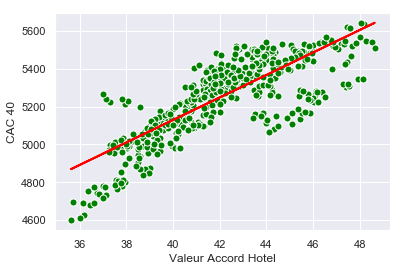

In [214]:

#On prend les valeurs d'une des entreprises du CAC40
X_ = dfE_C['AC.PA'].values #Dans cette exemple ici nous allons prendre les valeurs de accor hotels
#On prend les valeur CAC 40
Y_ = dfC_C['^FCHI'].values

import numpy as np
i = int(X_.shape[0]*0.7)
X_ = X_.reshape(-1,1)
Y_ = Y_.reshape(-1,1)
X_train = X_[:i]
Y_train = Y_[:i]
X_test = X_[i:]
Y_test = Y_[i:]
#On peut voir les config ici pour la variable X
X_.shape
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)

from sklearn.preprocessing import StandardScaler
#On va créer deux objet normaliser
#Deux ici car un pour le feature et l'autre pour la target value

sc_X = StandardScaler()
sc_Y = StandardScaler()

X_std = sc_X.fit_transform(X_)
Y_std = sc_Y.fit_transform(Y_)

lr.fit(X_std, Y_std)

pred_std = lr.predict(X_std)
lr.score(X_std,Y_std)
pred = sc_Y.inverse_transform(pred_std)

lr.coef_
lr.intercept_

import matplotlib.pyplot as plt
%matplotlib inline


plt.scatter(X_, Y_, c='green', edgecolor='white', s=50)
plt.plot(X_, pred, color='red', lw=2)
plt.xlabel('Valeur Accord Hotel')
plt.ylabel('CAC 40')

In [97]:
###Regression Lineraire 

#La régression linéaire s’appuie sur l’hypothèse que les données proviennent d’un phénomène 
#qui à la forme d'une droite 
#c’est à dire qu’il existe une relation linéaire entre l’entrée X (les observations) 
#et la sortie Y (les prédictions).

#Fait partie des algorithmes d'apprenstissages supervises

#Modele:

# Y = Xβ + c + ϵ
 
# X : data / observations
# β :coefficients 
# c : intercept 
# ϵ : error, cannot be explained by model 
# y : target / prédictions

#Using scikit-learn, linear regression 
#Sperate train and test data

#Linear Regression model prediction 
# ŷ = θ0 +θ1x1 +θ2x2 +⋯+θnxn

#• ŷ is the predicted value.
#• n is the number of features.
#• xi is the ith feature value.
#• θj is the jth model parameter (including the bias term θ0 and the feature weights θ1, θ2, ⋯, θn).


#Linear Regression model prediction (vectorized form)

#y = Hθ(X) + θT·X

#• θ is the model’s parameter vector, containing the bias term θ0 and the feature weights θ1 to θn.
#• θT is the transpose of θ (a row vector instead of a column vector).
#• x is the instance’s feature vector, containing x0 to xn, with x0 always equal to 1.
#• θT · x is the dot product of θT and x.
#• hθ is the hypothesis function, using the model parameters θ.


#Normal Equation
#θ = (XT·X)^(-1)·XT·y

#• θ is the value of θ that minimizes the cost function. 
#• y is the vector of target values containing y(1) to y(m).

#from sklearn.linear_model import LinearRegression 
#>>> lin_reg = LinearRegression()
#>>> lin_reg.fit(X, y)
#>>> lin_reg.intercept_, lin_reg.coef_
#>>> lin_reg.predict(X_new)

import pandas as pd
import numpy as np


# Effectuer une Régression Linéaire Simple sur les cours du CAC40 
# + determination des coefficients du CAC40 

CAC40 = pd.read_csv("Data/CAC4O/dfCAC_Close.csv",index_col=0)
Entreprises = pd.read_csv("Data/EntrepriseCAC40/dfEntrepriseCAC_Close.csv", index_col=0)

Y = CAC40
X = Entreprises

print(Y.shape)
print(X.shape)

(511, 1)
(511, 40)


In [98]:
from sklearn import linear_model

model = linear_model.LinearRegression()

In [99]:
from sklearn.preprocessing import StandardScaler
Regression = model.fit(X,Y)

In [100]:
print(Regression.coef_) #Determination des coefficients du CAC40 

[[ 1.57019683  1.86096089  1.92643861  2.73966377  0.62667928  3.51863455
   5.51340438  4.24221788  0.53803462 11.25831717  1.12932258  0.13894254
   0.86083365  1.16665847  8.36191931 10.77313143  1.08887374  2.22073451
   3.64120141  0.43680033  2.12739254  1.22792115  0.76852253  2.79811396
   1.07062929  8.35823077  0.78931162  1.12919717  0.02979615  0.82614077
   1.450381    5.58950856  2.67537723  3.1822302   1.99338345  0.35881108
   3.00852097  0.57725817  2.84312517  5.65964328]]


In [101]:
print(Regression.intercept_) # intercept

[-46.72350849]


In [102]:
print(Regression.coef_.shape) # Pour la Target Y (CAC40), 40 features/observations X (40 Entrepises du Cac40)

(1, 40)


In [103]:
#Phase 1. 

# Effectuer une Régression Linéaire Simple sur les cours du CAC40 
# en prenant les 20 dernières valeurs comme caractéristique.

CAC40 = pd.read_csv("Data/CAC4O/dfCAC_Close.csv",index_col=0,header=491)
Entreprises = pd.read_csv("Data/EntrepriseCAC40/dfEntrepriseCAC_Close.csv", index_col=0,header=491)

Y = CAC40
X = Entreprises

print(Y.shape)
print(X.shape)

from sklearn import linear_model

model = linear_model.LinearRegression()

from sklearn.preprocessing import StandardScaler
Regression = model.fit(X,Y)


(20, 1)
(20, 40)


In [104]:
print(Regression.coef_) #Determination des coefficients du CAC40 
print(Regression.intercept_) #
print(Regression.coef_.shape) # Pour la Target Y (CAC40), 40 features/observations X (40 Entrepises du Cac40)

[[ 1.35208346e+00  1.17356736e+00  9.40203645e-02  6.27060373e+00
  -2.72453646e+00  1.63808774e+00  4.64799857e+00  5.97707618e-01
  -2.44053497e+00  4.06286283e-01  3.93148146e+00  2.00566955e+00
   5.41590715e+00  2.14975781e+00 -5.34180398e-01  3.98948854e+00
   1.51711271e+00  2.03787722e+00 -1.90484195e-01  1.24186222e-01
   1.08546043e+00  1.93851961e+00  1.90129838e-01  4.35165308e-03
   9.07795421e-01  1.25184911e+00  1.98319700e+00  3.05133865e-01
   9.58461711e-01  5.10277030e+00  2.82378293e+00  4.06410733e+00
   7.14982398e-01 -1.06283161e+00  3.83052439e+00 -3.91409138e+00
   1.26273440e+00 -5.35661341e-01 -1.74482084e-01  4.40664938e+00]]
[577.60786204]
(1, 40)


# Phase 2

In [105]:
#Faisons ensuite une metrique grâce a cette bibliothèque:
from sklearn.metrics import r2_score
#On va caculer r^2
#on va utilise cette fontion r2_score avec notre
#variable cible et la prediction
r3 = r2_score(X_std, Y_std)
# Pour le resultat on va mettre 2 decimal
print("R2 on test data: {:.2}".format(r3))

R2 on test data: 0.61


In [106]:
lr.coef_

array([[0.80622496]])

In [107]:
lr.intercept_

array([1.28637504e-15])

In [108]:

#determination des coefficients : 
CAC40 = pd.read_csv("Data/CAC4O/dfCAC_Close.csv",index_col=0)
ENTREPRISES= pd.read_csv("Data/EntrepriseCAC40/dfEntrepriseCAC_Close.csv", index_col=0)
CAC40.shape
ENTREPRISES.shape


#from sklearn import linear_model

#model = linear_model.LinearRegression()
model = LinearRegression()


Regression_TOT = model.fit(ENTREPRISES, CAC40)
Regression_TOT.coef_
Regression_TOT.intercept_
Regression_TOT.coef_.shape

# lr.score(ENTREPRISES,CAC40)
# pred = sc_Y.inverse_transform(pred_std)

(1, 40)

In [109]:

import pandas as pd
import numpy as np

#Prend les 20 derniers valeurs du CAC40, en commencant par la ligne 491/511 jusqu'à la ligne 511/511
dfEntreprises_C20 = pd.read_csv("Data/EntrepriseCAC40/dfEntrepriseCAC_Close.csv", index_col=0, header=491)
dfCAC40_C20 = pd.read_csv("Data/CAC4O/dfCAC_Close.csv",index_col=0,header=491)

dfEntreprises_C20.isnull().any()
#verifie qu'il n'y a aucune valeur Nan dans les données
    
Entreprises = dfEntreprises_C20.values
CAC40 = dfCAC40_C20.values

print(CAC40.shape)
print(Entreprises.shape)



(20, 1)
(20, 40)


In [110]:
# On va entrainer notre modèle avec 70% des données
i = int(CAC40.shape[0]*0.7) 

CAC40 = CAC40.reshape(-1,1)

CAC40_train = CAC40[:i]
CAC40_train.shape

Entreprises_train = Entreprises[:i]
Entreprises_train.shape

#le CAC 40 est notre target Y

CAC40_TEST = CAC40[i:]
CAC40_TEST.shape

Entreprises_TEST = Entreprises[i:]
Entreprises_TEST.shape


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

model = linear_model.LinearRegression()

resultstrain = model.fit(Entreprises_train, CAC40_train)

print(resultstrain.coef_)

[[ 1.18064096  1.35010892  1.78358927  7.51471631  0.41236084  2.04516173
   3.39186004  0.31957981 -0.79786174  0.76836713  0.89046119  1.13526636
   3.69010585  0.66044553 -0.01885769  1.56421477  3.73332714  4.09679237
   2.38796192 -0.14199986 -0.67210167  2.89369848  1.89114313  1.8741931
   0.65499491  0.27516011  1.64374956  4.91992797 -0.01792048  1.68090723
   1.06928925  3.79855243  2.22380031 -0.3529395   1.98350465 -1.27874817
   0.8115405   0.51100702  0.16243572  1.58129699]]


In [111]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(model.score(Entreprises_train, CAC40_train))
#1 au maximum pour le score

1.0


In [112]:
print(resultstrain.coef_.shape)

(1, 40)


In [113]:
print(Entreprises_TEST.shape)

(6, 40)


In [114]:
print(resultstrain.intercept_)

[211.54254924]


In [115]:
CAC40_pred = model.predict(Entreprises_TEST)
CAC40_pred.shape

print(model.coef_)

[[ 1.18064096  1.35010892  1.78358927  7.51471631  0.41236084  2.04516173
   3.39186004  0.31957981 -0.79786174  0.76836713  0.89046119  1.13526636
   3.69010585  0.66044553 -0.01885769  1.56421477  3.73332714  4.09679237
   2.38796192 -0.14199986 -0.67210167  2.89369848  1.89114313  1.8741931
   0.65499491  0.27516011  1.64374956  4.91992797 -0.01792048  1.68090723
   1.06928925  3.79855243  2.22380031 -0.3529395   1.98350465 -1.27874817
   0.8115405   0.51100702  0.16243572  1.58129699]]


In [116]:
CAC40.shape

(20, 1)

In [117]:
ENTREPRISES.shape

(511, 40)

In [118]:
Regression_TOT.coef_.shape

(1, 40)

In [119]:
Regression_TOT.intercept_

array([-46.72350849])

In [120]:
Regression_TOT.coef_

array([[ 1.57019683,  1.86096089,  1.92643861,  2.73966377,  0.62667928,
         3.51863455,  5.51340438,  4.24221788,  0.53803462, 11.25831717,
         1.12932258,  0.13894254,  0.86083365,  1.16665847,  8.36191931,
        10.77313143,  1.08887374,  2.22073451,  3.64120141,  0.43680033,
         2.12739254,  1.22792115,  0.76852253,  2.79811396,  1.07062929,
         8.35823077,  0.78931162,  1.12919717,  0.02979615,  0.82614077,
         1.450381  ,  5.58950856,  2.67537723,  3.1822302 ,  1.99338345,
         0.35881108,  3.00852097,  0.57725817,  2.84312517,  5.65964328]])

In [121]:
# print(list(zip(ENTREPRISES, lr.coef_)))
print(list(zip(ENTREPRISES, lr.coef_)))

[('AC.PA', array([0.80622496]))]


In [122]:
ENTREPRISES.columns

Index(['AC.PA', 'ACA.PA', 'AI.PA', 'AIR.PA', 'ATO.PA', 'BN.PA', 'BNP.PA',
       'CA.PA', 'CAP.PA', 'CS.PA', 'DG.PA', 'DSY.PA', 'EL.PA', 'EN.PA',
       'ENGI.PA', 'FP.PA', 'FR.PA', 'FTI.PA', 'GLE.PA', 'KER.PA', 'LR.PA',
       'MC.PA', 'ML.PA', 'MT.AS', 'OR.PA', 'ORA.PA', 'PUB.PA', 'RI.PA',
       'RMS.PA', 'RNO.PA', 'SAF.PA', 'SAN.PA', 'SGO.PA', 'STM.PA', 'SU.PA',
       'SW.PA', 'UG.PA', 'URW.AS', 'VIE.PA', 'VIV.PA'],
      dtype='object')

In [123]:
# #Faisons ensuite une metrique grâce a cette bibliothèque:
# from sklearn.metrics import r2_score
# #On va caculer r^2
# #on va utilise cette fontion r2_score avec notre
# #variable cible et la prediction
# r2 = r2_score(CAC40, pred)
# # Pour le resultat on va mettre 2 decimal
# print("R2 on test data: {:.2}".format(r2))

In [124]:
# print(mean_squared_error(CAC40_TEST, CAC40_pred))
# #erreur quadratique moyenne d’un estimateur θ
# #en fonction du biais et de la variance de l’estimateur

In [125]:
# print(r2_score(CAC40_TEST, CAC40_pred))
# #coefficient de détermination, noté r2, 
# #est une mesure de la qualité de la prédiction d'une régression linéaire.

# Phase 3

In [126]:
###Regression Lineraire Multiple
#Finalement c'est pas ça... il faut des sorties multiples, pour predire j+1, j+2 etc.

import pandas as pd
import numpy as np

#determination des coefficients : 
CAC40_Close = pd.read_csv("Data/CAC4O/dfCAC_Close.csv",index_col=0)
CAC40_Open = pd.read_csv("Data/CAC4O/dfCAC_Open.csv",index_col=0)
CAC40_High = pd.read_csv("Data/CAC4O/dfCAC_High.csv",index_col=0)
CAC40_Low = pd.read_csv("Data/CAC4O/dfCAC_Low.csv",index_col=0)

Entreprises_Close = pd.read_csv("Data/EntrepriseCAC40/dfEntrepriseCAC_Close.csv", index_col=0)
Entreprises_Open = pd.read_csv("Data/EntrepriseCAC40/dfEntrepriseCAC_Open.csv", index_col=0)
Entreprises_High = pd.read_csv("Data/EntrepriseCAC40/dfEntrepriseCAC_High.csv", index_col=0)
Entreprises_Low = pd.read_csv("Data/EntrepriseCAC40/dfEntrepriseCAC_Low.csv", index_col=0)

CAC40_Multiple = np.concatenate((CAC40_Close, CAC40_Open, CAC40_High, CAC40_Low), axis=1)
Entreprises_Multiple = np.concatenate((Entreprises_Close, Entreprises_Open, Entreprises_High, Entreprises_Low), axis=1)

print(CAC40_Multiple.shape)
print(Entreprises_Multiple.shape)

(511, 4)
(511, 161)


In [127]:
from sklearn import linear_model

model = linear_model.LinearRegression()

In [128]:
from sklearn.preprocessing import StandardScaler

Regression = model.fit(Entreprises_Multiple, CAC40_Multiple)

#print(Regression.coef_) #Ponderation des entreprises du Cac40 pour les 4 Features X (Cours de Fermeture, Ouverture, Haut, Bas)

print(Regression.intercept_) #
print(Regression.coef_.shape) 
# Pour 4 Targets Y (Cours de Fermeture, Ouverture, Haut, Bas)
# 40 x 4 = 160 Features X (Cours de Fermeture, Ouverture, Haut, Bas)

[-42.11742716 -73.73467651 -72.40088689 -54.35069335]
(4, 161)


In [129]:
# On va entrainer notre modèle avec 70% des données
i = int(CAC40.shape[0]*0.7)

#### ???? faire avec un vecteur i ? ou utiliser i,k,l,m ?
#i = int(CAC40.shape[0]*0.7) #Close
#k = int(CAC40.shape[1]*0.7) #
#l = int(CAC40.shape[2]*0.7)
#m = int(CAC40.shape[3]*0.7)

CAC40 = CAC40.reshape(-1,1)

CAC40_train = CAC40[:i]
CAC40_train.shape

Entreprises_train = Entreprises[:i]
Entreprises_train.shape

#le CAC 40 est notre target Y

CAC40_TEST = CAC40[i:]
CAC40_TEST.shape

Entreprises_TEST = Entreprises[i:]
Entreprises_TEST.shape


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

model = linear_model.LinearRegression()

resultstrain = model.fit(Entreprises_train, CAC40_train)

print(resultstrain.coef_)

[[ 1.18064096  1.35010892  1.78358927  7.51471631  0.41236084  2.04516173
   3.39186004  0.31957981 -0.79786174  0.76836713  0.89046119  1.13526636
   3.69010585  0.66044553 -0.01885769  1.56421477  3.73332714  4.09679237
   2.38796192 -0.14199986 -0.67210167  2.89369848  1.89114313  1.8741931
   0.65499491  0.27516011  1.64374956  4.91992797 -0.01792048  1.68090723
   1.06928925  3.79855243  2.22380031 -0.3529395   1.98350465 -1.27874817
   0.8115405   0.51100702  0.16243572  1.58129699]]


In [130]:
#Phase 3. 

# Effectuer une Régression Linéaire Multiple 
# sur les cours du CAC40 
# en prenant les 20 dernières valeurs comme caractéristique.

#faire du multi sortie (jour +1, +2, +3)
#tendance jour -1, -2, -3


#Prend les 20 derniers valeurs du CAC40 (Fermeture, Ouverture, Haut, Bas),
#en commencant par la ligne 491/511 jusqu'à la ligne 511/511

CAC40_Close_20 = pd.read_csv("Data/CAC4O/dfCAC_Close.csv",index_col=0,header=491)
CAC40_Open_20 = pd.read_csv("Data/CAC4O/dfCAC_Open.csv",index_col=0,header=491)
CAC40_High_20 = pd.read_csv("Data/CAC4O/dfCAC_High.csv",index_col=0,header=491)
CAC40_Low_20 = pd.read_csv("Data/CAC4O/dfCAC_Low.csv",index_col=0,header=491)

Entreprises_Close_20 = pd.read_csv("Data/EntrepriseCAC40/dfEntrepriseCAC_Close.csv", index_col=0,header=491)
Entreprises_Open_20 = pd.read_csv("Data/EntrepriseCAC40/dfEntrepriseCAC_Open.csv", index_col=0,header=491)
Entreprises_High_20 = pd.read_csv("Data/EntrepriseCAC40/dfEntrepriseCAC_High.csv", index_col=0,header=491)
Entreprises_Low_20 = pd.read_csv("Data/EntrepriseCAC40/dfEntrepriseCAC_Low.csv", index_col=0,header=491)

CAC40_Multiple_20 = np.concatenate((CAC40_Close_20.values, CAC40_Open_20.values, CAC40_High_20.values, CAC40_Low_20.values), axis=1)
Entreprises_Multiple_20 = np.concatenate((Entreprises_Close_20.values, 
                                       Entreprises_Open_20.values, Entreprises_High_20.values, Entreprises_Low_20.values), axis=1)

# Entreprises_Close_20.isnull().any()
# Entreprises_Open_20.isnull().any()
# Entreprises_High_20.isnull().any()
# Entreprises_Low_20.isnull().any()

#Verifie qu'il n'y a aucune valeur Nan dans les données
    
Entreprises = Entreprises_Multiple_20
CAC40 = CAC40_Multiple_20

print(CAC40.shape)
print(Entreprises.shape)


(20, 4)
(20, 161)


# Affichage des Cours

In [131]:
# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns


# print the graphs in the notebook
%matplotlib inline

# set seaborn style to white
sns.set_style("white")

In [165]:
# cours des entreprises du CAC pour la close
from os import path

path = "Data/Image/Les cours de chaque enteprise du CAC40/"
def plot_df(col):
    plt.figure(figsize=(17, 8))
    plt.plot(dfE_C[col])
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.grid(False)
    plt.savefig(path+col+'.png')                
    plt.show()
    

In [160]:
#lancer la fonction pour afficher et enregistrer les cours 
# for col in dfE_C.columns:
#     plot_df(col)

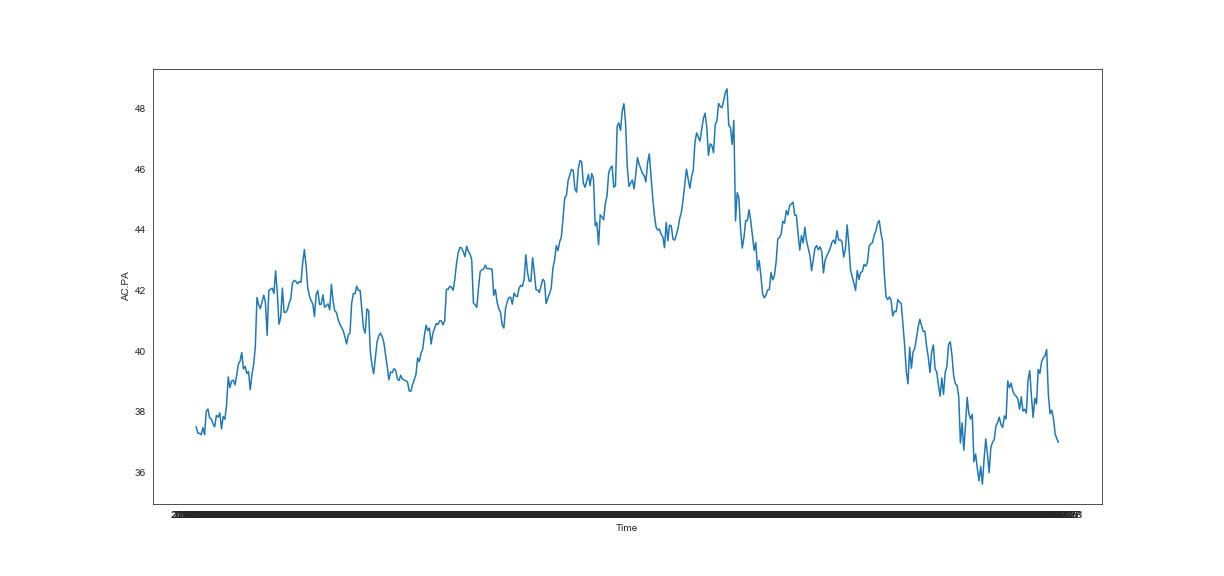

In [164]:
#exemple Ici le cours de Accor Hotel en fonction du temps
Image('Data/Image/Les cours de chaque enteprise du CAC40/ImageAC.PA.png', width=800)


# Afficher toutes les regression linéaire 

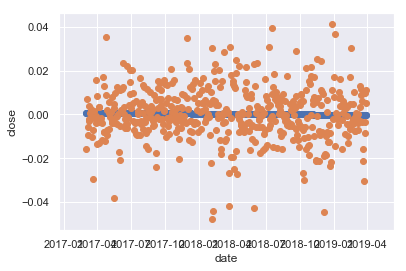

In [198]:
#essaie pour faire une lineaire regression depuis l'api 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from datetime import datetime
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
from sklearn.linear_model import LinearRegression
import pandas_datareader.data as web

start = datetime(2017, 3, 1)
end = datetime(2019, 3, 30)
data_SP = web.DataReader('JPM', 'iex', start, end)

dates = list(map(lambda x: datetime.strptime(x,"%Y-%m-%d"),list(data_SP.index)))
days_since = list(map(lambda x: (x-start).days,dates))

model = LinearRegression(fit_intercept=True)
model.fit(np.array(days_since)[1:][:, np.newaxis],data_SP['close'].pct_change(1)[1:]) # <------------

yfit = model.predict(np.array(days_since)[:, np.newaxis])

plt.figure()
plt.scatter(dates, yfit)
plt.scatter(dates, data_SP['close'].pct_change(1))
plt.xlabel('date')
plt.ylabel('close')
plt.show()

In [215]:
#Engregistrer toutes les lineaire regression 

In [237]:
path2 = "Data/Image/Regression lineaire des cours d'entreprise/"
def plot_LR(Entreprise):
    X_ = dfE_C[Entreprise].values#valeur de toutes les entreprises
    #On prend les valeur CAC 40
    Y_ = dfC_C['^FCHI'].values
    i = int(X_.shape[0]*0.7)
    X_ = X_.reshape(-1,1)
    Y_ = Y_.reshape(-1,1)
    X_train = X_[:i]
    Y_train = Y_[:i]
    X_test = X_[i:]
    Y_test = Y_[i:]
    #On peut voir les config ici pour la variable X
    X_.shape
    lr = LinearRegression(normalize=True)
    sc_X = StandardScaler()
    sc_Y = StandardScaler()
    X_std = sc_X.fit_transform(X_)
    Y_std = sc_Y.fit_transform(Y_)
    lr.fit(X_std, Y_std)
    pred_std = lr.predict(X_std)
    lr.score(X_std,Y_std)
    pred = sc_Y.inverse_transform(pred_std)
    plt.scatter(dfE_C[Entreprise].values, dfC_C['^FCHI'].values, c='green', edgecolor='white', s=200)
    plt.plot(dfE_C[Entreprise].values, pred, color='red', lw=2) #lw l'epaisseur de la ligne rouge
    plt.xlabel(Entreprise)
    plt.ylabel('CAC 40')
    plt.savefig(path2+Entreprise+'.png') 
    plt.show()

In [239]:
# #lancer la fonction pour afficher et enregistrer les linéaire regression
# for Entreprise in dfE_C.columns:
#     plot_LR(Entreprise)

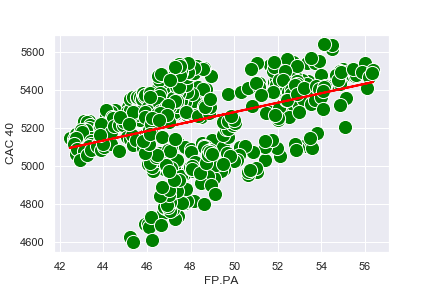

In [243]:
#exemple Ici la regression linéaire de total 
Image("Data/Image/Regression lineaire des cours d'entreprise/FP.PA.png", width=400)
